# <center>Analyzing voting behavior in United States relying on<center>  <center>Facebook leaked data<center>
<br>
<br>
<br>
<br>

## <div style="text-align: right">*M.S. student Cocirta Darius*</div>

This study aims to analyze voting behavior in United States
relying on a one million records dataset with data collected
from Facebook personal profiles of US citizens after a
security breach in 2021. 
* Firstly, It aims to classify each individual from dataset in two groups (democrats and republicans) using **a simple rule-based classification approach** based on the RESIDENCE (state) and GENDER;
* Finally, I will try to obtain **insights regarding the voting behavior of voters in the U.S.A.**

# About dataset

* The most recent Facebook data breach happened in April 2021, when personal data pertaining to 533 million Facebook users was made public on an online forum. This information, which included names, phone numbers, and more, was originally scraped using Facebook's contact importer in 2019.

* A Facebook spokesperson said that the data had been scraped because of a vulnerability that the company patched in 2019. A user, in a low-level hacking forum, published the data for free.

* The exposed data includes the personal information of over 533 million Facebook users from 106 countries. It includes their phone numbers, Facebook IDs, full names, locations, birthdates, bios, and, in some cases, email addresses.

* For this study, I have focused just on data about U.S. citizens. From the original dataset I have deleted the phone numbers and email addresses and also, I have shuffled the the values from every column in order to not expose any real personal data. Also, I have shuffled the user_id for the exact same reason. **NO REAL PERSON CAN BE IDENTIFIED USING THIS STUDY.**

* Atributtes of the dataset are:
1. **uid** - User id
2. **firstname** - Firstname of the user
3. **lastname** - Lastname of the
4. **gender** - Gender of the user
5. **residence** - Residence state of the user
6. **birthplace** - Birthplace state of the user
7. **relationship** - Relationship status of the user
8. **workplace** - Workplace of the user

# Related work

There is a lot of scientific research that addresses the issue of voting behavior in U.S.A. 
However, these studies investigate the historical or social perspectives related to voting.

But with the phenomenon of digitization, political parties have seen an opportunity in studying open source data in order to create national databases of voters, collecting information from many sources to create detailed profiles of voters with thousands of data points and build models that predict people’s stances on issues or candidates.

**Political campaigns can use this data to help decide whom to target in their outreach efforts, how to reach them and how they might respond to certain messages.**

**It is clear that political parties use Big Data to study voters behavior, but such studies are not presented online. Moreover, the use of social networks data for political purposes is a sensitive topic. This trend started only in 2016 when the Russians influenced the presidential elections in the United States using Facebook.**

# Implementation

The main purpose of this paper is to analyze voters behavior in United States. In order to do so, I have constructed **a simple rule-based classifier** based on RESIDENCE state and GENDER of each individual.

**Red states vs blue states vs swing states**<br>
Starting in the 2000 United States presidential election, the terms "red state", "blue state" and "swing state" have referred to U.S. states whose voters predominantly and traditionally vote for the Republican Party (red states), Democratic Party (blue states) or which oscillates between those (swing states) in presidential and other elections.

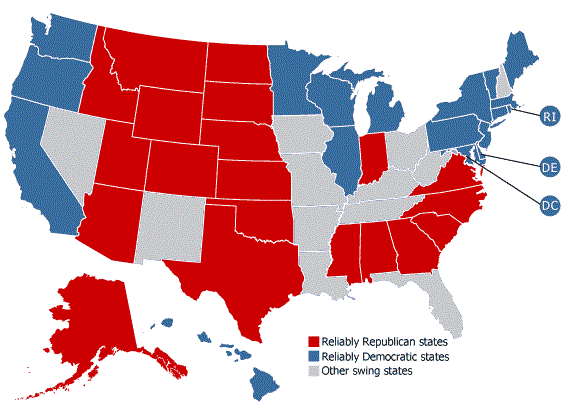

**Partisan advantages by gender**<br>
In general, women lean Democratic while support among men is roughly evenly split between the two parties.

For this study I have used **Spark** because it provides a faster and more general data processing platform, leting you to run programs up to 100x faster in memory, or 10x faster on disk, than Hadoop. **(in reality is just like 2X faster)**

# Preprocessing

**Importing needed libraries**

In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.functions import *
import collections
import numpy as np
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType, StructType, StructField

**Creating SparkContext**

In [2]:
conf = SparkConf().setMaster("local").setAppName("voting behavior")
sc = SparkContext(conf=conf)

**Importing dataset in RDD form**

In [3]:
lines_rdd = sc.textFile(r"C:\Users\Asus\Desktop\M\AI\2\Big data technologies\New folder\C\C2\USA.txt")

**Maping the RDD in order to create a dataframe context**

In [4]:
dataframe = lines_rdd.map(lambda x: (x, ))

**Collecting the results**

In [5]:
result = dataframe.collect()

**Checking the results**

In [6]:
for results in result[1:6]:
    print(results)

('0,4510002,Ilee,Mountz,female,California, California,Single,Amazon Sortation Center',)
("1,2270500,Bianca,Saxton,female,Alabama, Alabama,Single,Children's of Alabama",)
('2,2078208,Jason,Freeman,male,Alabama, Alabama,Married,Self-Employed',)
('3,4219548,Michael,Hanko,male,Idaho, California,In a relationship,Timberline Tree Service',)
('4,4119955,Lora,Jackson,female,California, Oregon,In a relationship,Idaho Pizza Company',)


**Creating a DataFrame context**

In [7]:
""" I had some weird errors while trying to create my dataframe so I did it in a more unusual way
 firstly, I have created a singe column dataframe and after, I split it into its columns using pyspark.sql.functions"""

columns = ["col1"]
data = result[1::]

sqlContext = SQLContext(sc)

df = sqlContext.createDataFrame(data, columns)

split_cols = split(df['col1'], ',')

df1 = df.withColumn('indx', split_cols.getItem(0)) \
    .withColumn('uid', split_cols.getItem(1)) \
    .withColumn('firstname', split_cols.getItem(2)) \
    .withColumn('lastname', split_cols.getItem(3)) \
    .withColumn('gender', split_cols.getItem(4)) \
    .withColumn('residence', split_cols.getItem(5)) \
    .withColumn('birthplace', split_cols.getItem(6)) \
    .withColumn('relationship', split_cols.getItem(7)) \
    .withColumn('workplace', split_cols.getItem(8))

df1 = df1.drop('col1', 'indx')
df1.show(truncate = True)

C:\Users\Asus\anaconda3\lib\site-packages\pyspark\sql\context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+-------+---------+---------------+------+----------+-----------+-----------------+--------------------+
|    uid|firstname|       lastname|gender| residence| birthplace|     relationship|           workplace|
+-------+---------+---------------+------+----------+-----------+-----------------+--------------------+
|4510002|     Ilee|         Mountz|female|California| California|           Single|Amazon Sortation ...|
|2270500|   Bianca|         Saxton|female|   Alabama|    Alabama|           Single|Children's of Ala...|
|2078208|    Jason|        Freeman|  male|   Alabama|    Alabama|          Married|       Self-Employed|
|4219548|  Michael|          Hanko|  male|     Idaho| California|In a relationship|Timberline Tree S...|
|4119955|     Lora|        Jackson|female|California|     Oregon|In a relationship| Idaho Pizza Company|
|4149789|     Hieu|             Le|  male|   Georgia|    Vietnam|In a relationship|           I LUV PHO|
|3243683|    Jason|McMandersonreal|  male|Washington| W

In [8]:
import pyspark.sql.functions as F # some very short data cleaning:))
l = ['male', 'female']
df1 = df1.filter(F.col("gender").isin(l))

# Building the simple rule-based classifier

A simple rule-based classifier is a type of classification algorithm that makes decisions based on predefined rules. Instead of learning patterns and relationships from the data like in machine learning algorithms, rule-based classifiers use explicit if-then-else statements to determine the class label of an input instance.

In [9]:
red_states = ['Alabama', 'Alaska', 'Arkansas', 'Idaho', 'Kansas', 'Kentucky', 'Louisiana', 
             'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'North Dakota', 'Oklahoma', 'South Carolina', 'South Dakota', 
             'Tennessee', 'Utah', 'West Virginia', 'Wyoming', 'Indiana']

blue_states = ['California', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Maryland', 'Massachusetts', 
              'New Jersey', 'New Mexico', 'New York', 'Oregon', 'Rhode Island', 'Vermont', 'Washington', 'Colorado', 
              'Maine', 'Virginia']
swing_states = ['Arizona', 'Georgia', 'Florida', 'Iowa', 'Michigan', 'Nevada', 'New Hampshire', 'North Carolina', 
               'Ohio', 'Pennsylvania', 'Texas', 'Minnesota', 'Wisconsin' ]

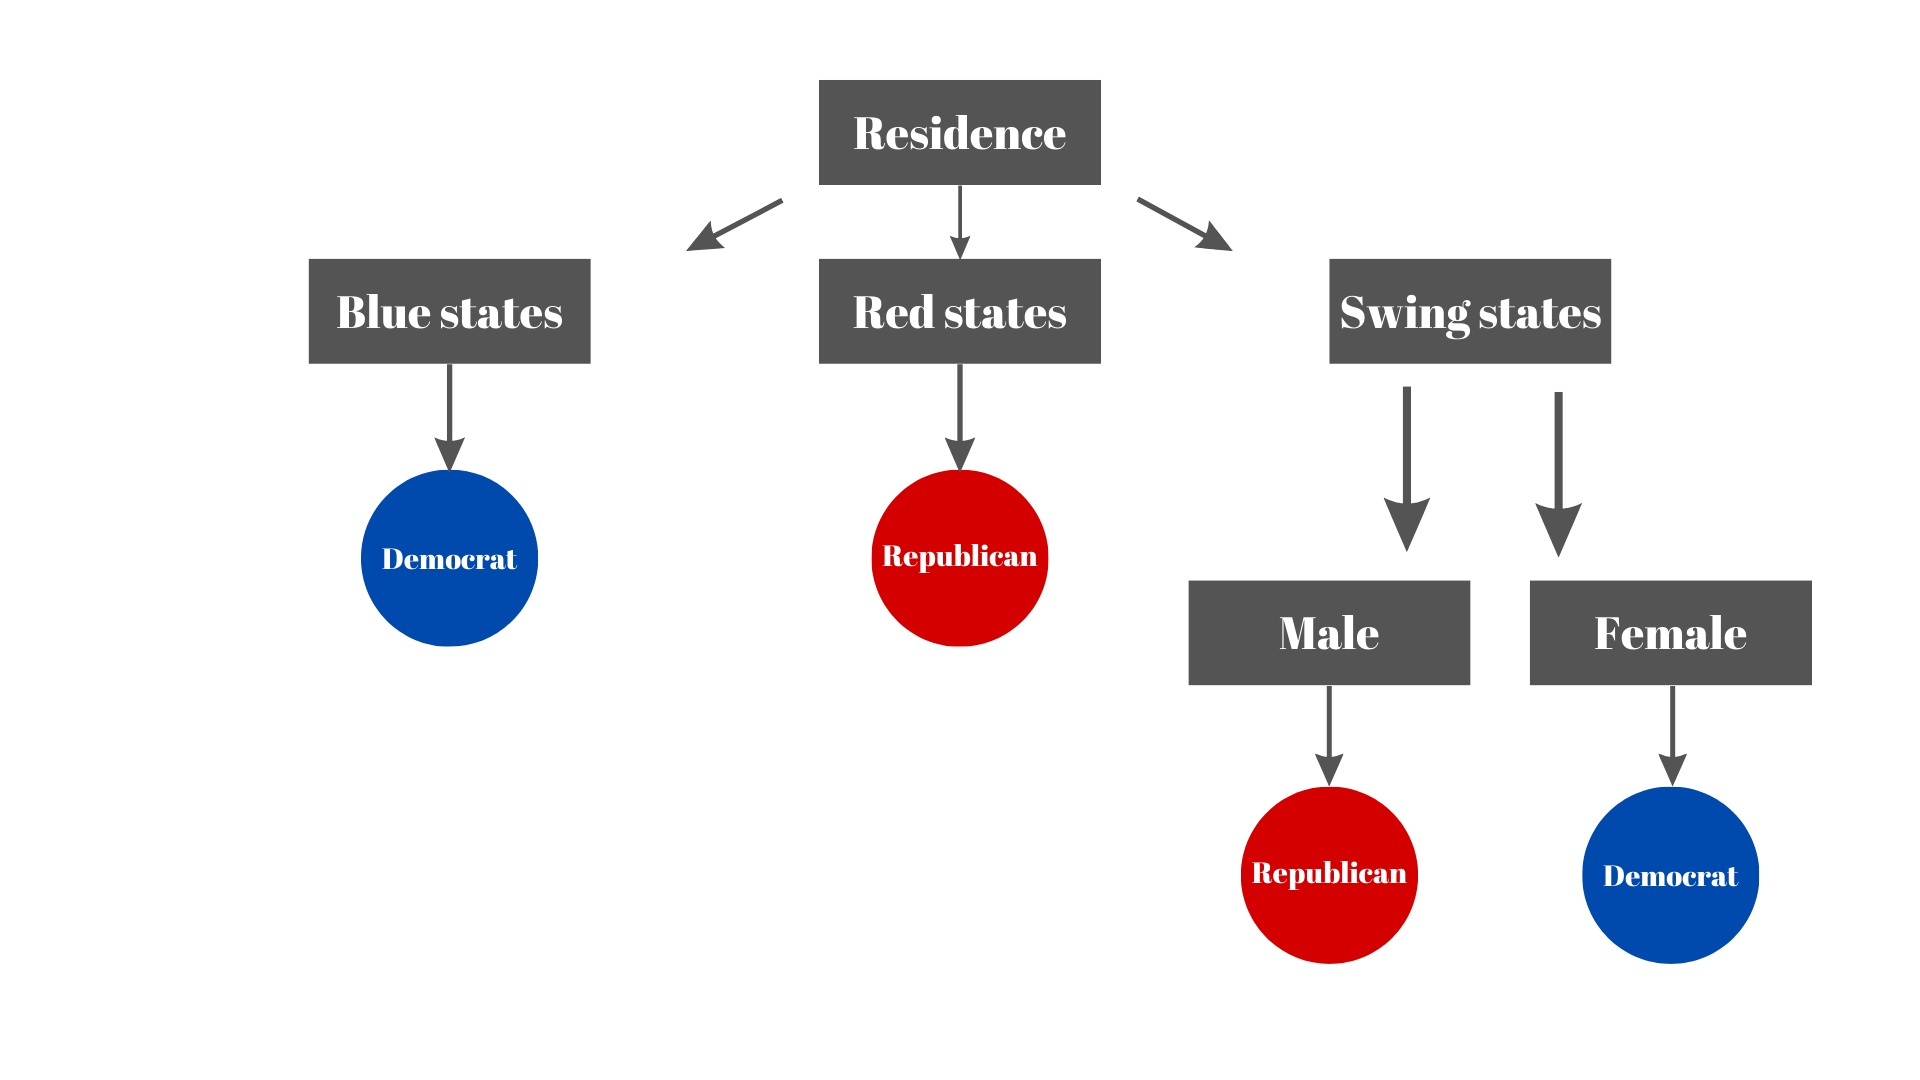

In [10]:
def categorise(row):  
    if row['residence'] in red_states:
        return 'republican'
    elif row['residence'] in blue_states:
        return 'democrat'
    elif row['residence'] in swing_states and row['gender'] == 'male':
        return 'republican'
    elif row['residence'] in swing_states and row['gender'] == 'female':
        return 'democrat'

In [12]:
# converting Python function to a PySpark UDF
categorise_udf = udf(categorise, StringType())

# applying the UDF to create the "party" column
df1 = df1.withColumn("party", categorise_udf(df1["residence"], df1["gender"]))

In [14]:
df1.show()

+-------+---------+---------------+------+----------+-----------+-----------------+--------------------+----------+
|    uid|firstname|       lastname|gender| residence| birthplace|     relationship|           workplace|     party|
+-------+---------+---------------+------+----------+-----------+-----------------+--------------------+----------+
|4510002|     Ilee|         Mountz|female|California| California|           Single|Amazon Sortation ...|  democrat|
|2270500|   Bianca|         Saxton|female|   Alabama|    Alabama|           Single|Children's of Ala...|republican|
|2078208|    Jason|        Freeman|  male|   Alabama|    Alabama|          Married|       Self-Employed|republican|
|4219548|  Michael|          Hanko|  male|     Idaho| California|In a relationship|Timberline Tree S...|republican|
|4119955|     Lora|        Jackson|female|California|     Oregon|In a relationship| Idaho Pizza Company|  democrat|
|4149789|     Hieu|             Le|  male|   Georgia|    Vietnam|In a re

# Data exploration

In [15]:
df1.printSchema()

root
 |-- uid: string (nullable = true)
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- residence: string (nullable = true)
 |-- birthplace: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- workplace: string (nullable = true)
 |-- party: string (nullable = true)



In [28]:
df1.groupBy("gender").count().sort("count",ascending=False).show(truncate = False)
df1.groupBy("residence").count().sort("count",ascending=False).show(truncate = False)
df1.groupBy("birthplace").count().sort("count",ascending=False).show(truncate = False)
df1.groupBy("relationship").count().sort("count",ascending=False).show(truncate = False)
df1.groupBy("workplace").count().sort("count",ascending=False).show(truncate = False)

+------+------+
|gender|count |
+------+------+
|male  |547849|
|female|380414|
+------+------+

+--------------+------+
|residence     |count |
+--------------+------+
|Texas         |120897|
|California    |109875|
|Florida       |73090 |
|New York      |50964 |
|Illinois      |46920 |
|Louisiana     |45195 |
|North Carolina|45115 |
|Michigan      |35881 |
|Alabama       |28857 |
|New Jersey    |27745 |
|Ohio          |26673 |
|Idaho         |23013 |
|Washington    |20487 |
|Indiana       |20368 |
|Georgia       |20351 |
|Arizona       |18440 |
|Virginia      |17669 |
|Minnesota     |17640 |
|Pennsylvania  |17012 |
|Connecticut   |15205 |
+--------------+------+
only showing top 20 rows

+---------------+-----+
|birthplace     |count|
+---------------+-----+
| California    |87656|
| Texas         |82837|
| New York      |49281|
| Illinois      |45584|
| Louisiana     |41513|
| Michigan      |38403|
| Florida       |35740|
| Ohio          |27429|
| Alabama       |26348|
| New Jersey 

## Democrats vs republicans

In [19]:
dem = df1.filter(df1.party == 'democrat')
rep = df1.filter(df1.party == 'republican')
dem.show(5, truncate = True)
rep.show(5, truncate = True)

+-------+---------+---------------+------+----------+-----------+-----------------+--------------------+--------+
|    uid|firstname|       lastname|gender| residence| birthplace|     relationship|           workplace|   party|
+-------+---------+---------------+------+----------+-----------+-----------------+--------------------+--------+
|4510002|     Ilee|         Mountz|female|California| California|           Single|Amazon Sortation ...|democrat|
|4119955|     Lora|        Jackson|female|California|     Oregon|In a relationship| Idaho Pizza Company|democrat|
|3243683|    Jason|McMandersonreal|  male|Washington| Washington|           Single|   Durham Upholstery|democrat|
|3749149|     Ryan|           Ware|  male|Washington|      Idaho|           Single|         Sunset Mart|democrat|
|  19237|     Marc|       Dembling|  male|New Jersey| New Jersey|          Married| Methfessel & Werbel|democrat|
+-------+---------+---------------+------+----------+-----------+-----------------+-----

In [17]:
df1.groupBy("party").count().sort("count",ascending=False).show(truncate = False)

+----------+------+
|party     |count |
+----------+------+
|democrat  |508905|
|republican|419358|
+----------+------+



### Gender

In [20]:
dem.groupBy("gender").agg(count("*").alias("count")).show()
rep.groupBy("gender").agg(count("*").alias("count")).show()

+------+------+
|gender| count|
+------+------+
|female|300925|
|  male|207980|
+------+------+

+------+------+
|gender| count|
+------+------+
|female| 79489|
|  male|339869|
+------+------+



### Residence

In [21]:
dem.groupBy("residence").agg(count("*").alias("count")).orderBy(col("count").desc()).show()
rep.groupBy("residence").agg(count("*").alias("count")).orderBy(col("count").desc()).show()

+--------------+------+
|     residence| count|
+--------------+------+
|    California|109875|
|      New York| 50964|
|         Texas| 48736|
|      Illinois| 46920|
|       Florida| 30381|
|    New Jersey| 27745|
|    Washington| 20487|
|North Carolina| 18406|
|      Virginia| 17669|
|      Michigan| 15935|
|   Connecticut| 15205|
| Massachusetts| 14700|
|          Ohio| 11381|
|      Maryland| 11258|
|      Colorado| 10147|
|        Oregon|  9379|
|       Georgia|  8372|
|       Arizona|  7793|
|     Minnesota|  7580|
|  Pennsylvania|  7092|
+--------------+------+
only showing top 20 rows

+--------------+-----+
|     residence|count|
+--------------+-----+
|         Texas|72161|
|     Louisiana|45195|
|       Florida|42709|
|       Alabama|28857|
|North Carolina|26709|
|         Idaho|23013|
|       Indiana|20368|
|      Michigan|19946|
|          Ohio|15292|
|       Georgia|11979|
|          Utah|11828|
|     Tennessee|10958|
|       Arizona|10647|
|South Carolina|10258|
|     M

### Relationship status

In [26]:
dem.groupBy("relationship").agg(count("*").alias("count")).orderBy(col("count").desc()).show(truncate = False)
rep.groupBy("relationship").agg(count("*").alias("count")).orderBy(col("count").desc()).show(truncate = False)

+-------------------------+------+
|relationship             |count |
+-------------------------+------+
|Married                  |215706|
|Single                   |166927|
|In a relationship        |82492 |
|Engaged                  |19441 |
|Divorced                 |6723  |
|It's complicated         |5696  |
|Widowed                  |4829  |
|Separated                |3662  |
|In a domestic partnership|1430  |
|In an open relationship  |1426  |
|In a civil union         |573   |
+-------------------------+------+

+-------------------------+------+
|relationship             |count |
+-------------------------+------+
|Married                  |170982|
|Single                   |146804|
|In a relationship        |66421 |
|Engaged                  |16963 |
|Divorced                 |5968  |
|It's complicated         |3962  |
|Separated                |3168  |
|Widowed                  |2878  |
|In an open relationship  |972   |
|In a domestic partnership|814   |
|In a civil union  

### Workplace

In [27]:
dem.groupBy("workplace").agg(count("*").alias("count")).orderBy(col("count").desc()).show(truncate = False)
rep.groupBy("workplace").agg(count("*").alias("count")).orderBy(col("count").desc()).show(truncate = False)

+-------------------------+-----+
|workplace                |count|
+-------------------------+-----+
|Self-Employed            |20340|
|Facebook                 |7134 |
|Hollister Co.            |3251 |
|The Krusty Krab          |3246 |
|Retired                  |3200 |
|Stay-at-home parent      |2551 |
|McDonald's               |2354 |
|Walmart                  |1855 |
|U.S. Army                |1528 |
|Forever 21               |1235 |
|Starbucks                |1161 |
|Diamond Supply Co        |1156 |
|Student                  |1116 |
|Foot Locker              |1110 |
|None                     |981  |
|U.S. Navy                |917  |
|NBA                      |888  |
|Target                   |880  |
|Aeropostale              |846  |
|True Religion Brand Jeans|781  |
+-------------------------+-----+
only showing top 20 rows

+-----------------------+-----+
|workplace              |count|
+-----------------------+-----+
|Self-Employed          |18066|
|Facebook               |4547 

# Using Dataproc to run my script

I ran my script in Dataproc with the following features:

**Cluster configuration**<br>
**Type:** Dataproc cluster; **Region:** europe-west1; **Master node:** Standard (1 master, N workers); Machine type: n1-standard-4; Primary disk type: pd-standard; Primary disk size:500GB; **Worker nodes**: 2; Machine type: n1-standard-4; Primary disk type: pd-standard; Primary disk size:500GB; **Secondary worker nodes:** 0; **Secure Boot:** Disabled; **VTPM:** Disabled; **Integrity Monitoring:** Disabled; **Cloud Storage staging bucket:** dataproc-staging-europe-west1-892875597739-roaz0umb; **Image version:** 2.0.43-debian10; **Created:** Jun 18, 2022, 1:06:47 PM; **Optional components:** Jupyter;<br>

**When I ran the application:**<br>
**CPU utilization:** at highest: 42.08%; **Network Bytes:** at highest: 1.256MiB/s; **Network Packets:** at highest: 942.8/s; **Disk bytes:** at highest: 211.84MiB/s; **Disk operations:** at highest: 1.342l/s;

**Google storage bucket**<br>
I have set **Public access status: Not public** because of the document's sensitive data.

# Results & conclusion

I chose this topic because I noticed that political are using social networks to influence the vote of citizens in election campaigns. In order to use social networks effectively to influence public opinion, political parties must target exactly those people who do not agree with their vision and try to change their opinion. In the same way, relaying on the Facebook leaked dataset, I tried to see if it is possible to identify the political affiliation of each individual. 

Not having many characteristics of individuals available, I used the historical records of the presidential election in U.S. to 
 make a clear distinction between democratic states (Blue states), republican states (Red states) and so called swing states. It was challenging to identify political affiliation in swing states but there I used historical records of how every gender votes (between democrats and republicans). 

After I identified the political view for each individual, I found out the following:
* there are 9% more democrats than republicans in the dataset (54.82% democrats, 45.17% republicans)
* men tend to vote more with Republicans while most of the women vote  with Democrats
* even that Texas and Florida are swing states, citizens from those states tend to vote more with Republicans
* Democrats tend to rely more on the state's social services

## Bibliography

* https://www.britannica.com/list/a-history-of-us-presidential-elections-in-maps

* http://www.stat.columbia.edu/~jakulin/Politics/ - University of Columbia

* https://www.icpsr.umich.edu/web/pages/instructors/setups/voting.html - University of Michingan

* Voting Behavior in US Presidential Elections - University of Gothenburg

* Structure, Behavior, and Voter Turnout in the United States, Richard J. Timpone, The American Political Science Review, Vol. 92, No. 1 (Mar., 1998)

* The National Study of Learning, Voting, and Engagement Institute for Democracy & Higher Education

* History of Voting in America - Office of the Secretary of State